<a href="https://colab.research.google.com/github/Dhruvjain484/Machine-learning-projects-for-beginner/blob/main/Salary%20Data/Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

##Importing the dataset

In [44]:
dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [45]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [46]:
y = y.reshape(len(y), 1)

##Scaling the dataset


In [47]:
from sklearn.preprocessing import StandardScaler
scaled_x = StandardScaler()
scaled_y = StandardScaler()

x_scaled = scaled_x.fit_transform(x)
y_scaled = scaled_y.fit_transform(y)

##Training the Regression model on the dataset

In [48]:
# from sklearn.linear_model import LinearRegression 
# regressor = LinearRegression()

# from sklearn.svm import SVR
# regressor = SVR(kernel= 'rbf')

# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor()

from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_scaled, y_scaled)

[09:08:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

##Predicting the result

In [49]:
y_pred = scaled_y.inverse_transform(regressor.predict(x_scaled))
np.set_printoptions(precision = 2)
y_pred = y_pred.reshape(len(y_pred), 1)
y_pred

array([[ 39860.65],
       [ 45393.4 ],
       [ 38602.94],
       [ 42422.95],
       [ 41139.68],
       [ 56722.05],
       [ 59216.45],
       [ 59216.45],
       [ 59216.45],
       [ 58822.7 ],
       [ 61420.2 ],
       [ 57079.63],
       [ 57079.63],
       [ 57254.59],
       [ 61151.99],
       [ 67037.2 ],
       [ 66936.55],
       [ 82243.57],
       [ 82195.74],
       [ 92798.38],
       [ 92798.38],
       [ 98228.56],
       [101257.7 ],
       [112440.36],
       [109247.68],
       [106937.13],
       [116035.95],
       [113657.66],
       [121879.3 ],
       [121761.88]], dtype=float32)

In [50]:
np.concatenate((y, y_pred), 1)


array([[ 39343.  ,  39860.65],
       [ 46205.  ,  45393.4 ],
       [ 37731.  ,  38602.94],
       [ 43525.  ,  42422.95],
       [ 39891.  ,  41139.68],
       [ 56642.  ,  56722.05],
       [ 60150.  ,  59216.45],
       [ 54445.  ,  59216.45],
       [ 64445.  ,  59216.45],
       [ 57189.  ,  58822.7 ],
       [ 63218.  ,  61420.2 ],
       [ 55794.  ,  57079.63],
       [ 56957.  ,  57079.63],
       [ 57081.  ,  57254.59],
       [ 61111.  ,  61151.99],
       [ 67938.  ,  67037.2 ],
       [ 66029.  ,  66936.55],
       [ 83088.  ,  82243.57],
       [ 81363.  ,  82195.74],
       [ 93940.  ,  92798.38],
       [ 91738.  ,  92798.38],
       [ 98273.  ,  98228.56],
       [101302.  , 101257.7 ],
       [113812.  , 112440.36],
       [109431.  , 109247.68],
       [105582.  , 106937.13],
       [116969.  , 116035.95],
       [112635.  , 113657.66],
       [122391.  , 121879.3 ],
       [121872.  , 121761.88]])

##Visulising the regression model

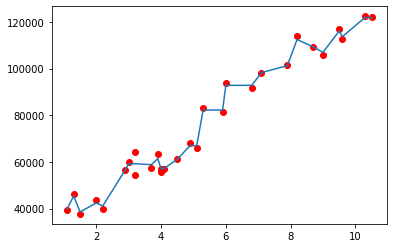

In [51]:
plt.scatter(x, y, color = 'r')
plt.plot(x, y_pred)

##Checking the accuracy

In [52]:
from sklearn.metrics import r2_score
r2_score(y ,y_pred)

0.9965836699188425